# Jupyter Notebook on IBM Watson Studio

## Import libraries

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and explore dataset (iris)

### The iris dataset is a classification task consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width.

In [2]:
# import some data to play with
iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
X = iris.data  # we only take the first two features.
y = iris.target
# labels = [0, 1, 2]
print(X, X.shape)
print(y, y.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(data=X, columns=columns)
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
x = df.iloc[:, :].values
x, x.shape

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

## EDA (exploratory data analysis)

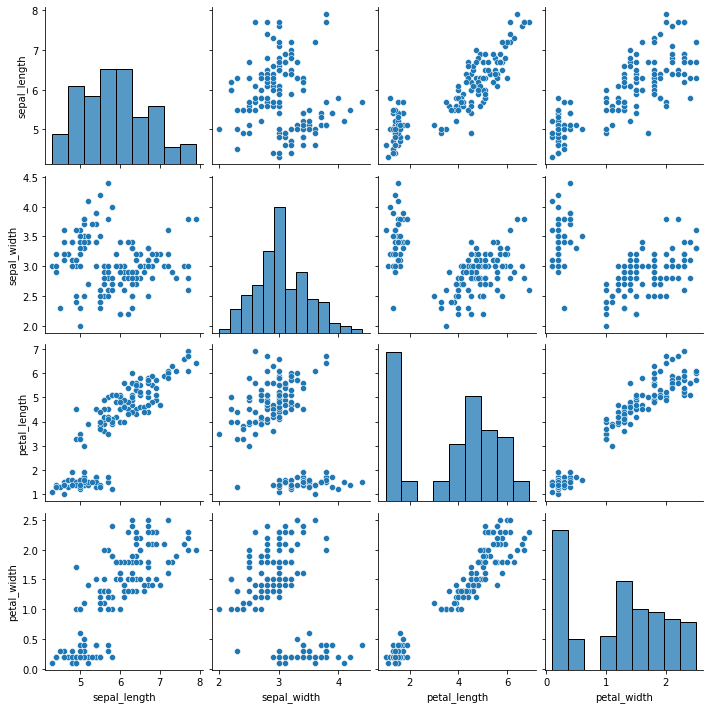

In [5]:
sns.pairplot(df)

## Optimization of KMeans model

In [6]:
km_inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200, n_init=10, random_state=42)
    kmeans.fit(x)
    km_inertia.append(kmeans.inertia_)
#
print(km_inertia)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.03998724608725, 34.40900974025975, 30.063110617452732, 27.98222120518689, 26.04670525088948]


Text(0, 0.5, 'Inertia')

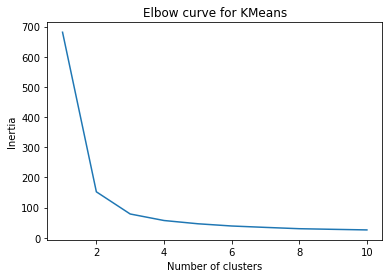

In [7]:
plt.plot(range(1, 11), km_inertia)
plt.title('Elbow curve for KMeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## Application of selected KMeans model

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=10, random_state=42)
kmeans.fit(x)
preds = kmeans.predict(X)
km_centroids = kmeans.cluster_centers_
# km_labels = kmeans.labels_
print(km_centroids, km_centroids.shape)
print(preds, preds.shape)
# print(km_labels)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]] (3, 4)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0] (150,)


## Plotting resulting KMeans clustering

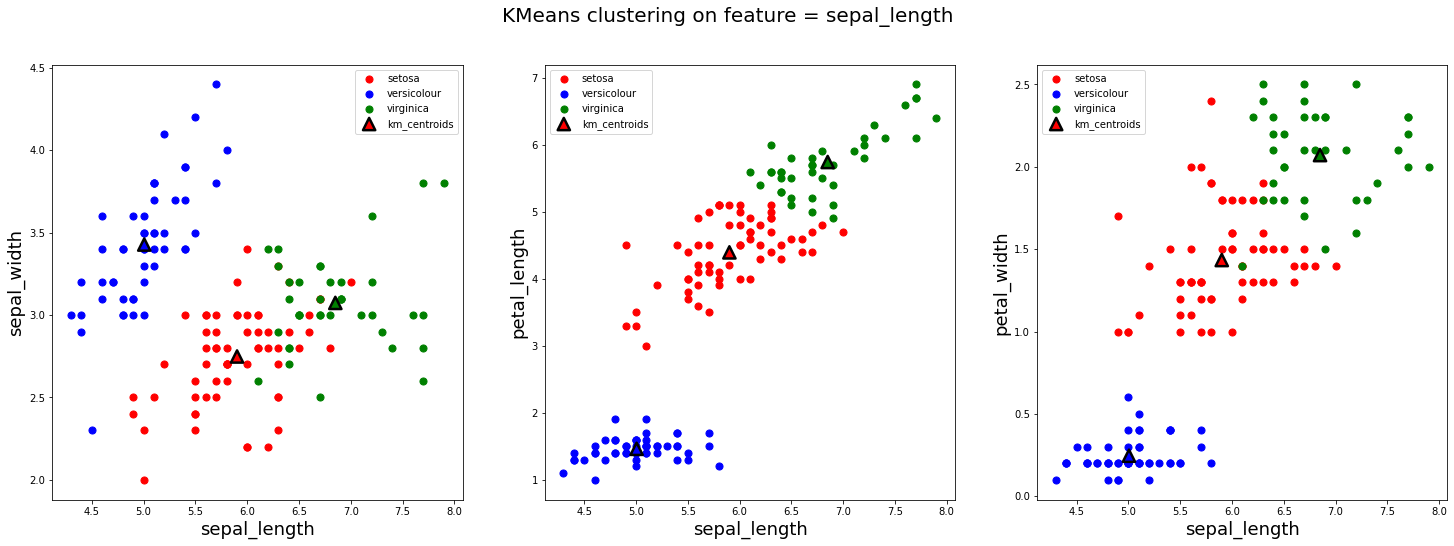

In [9]:
plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams['axes.labelsize'] = 18
#
fig, axs = plt.subplots(1, 3)
fig.suptitle('KMeans clustering on feature = sepal_length', fontsize=20)
#
axs[0].scatter(x[preds == 0, 0], x[preds == 0, 1], s=50, c='r', label='setosa')
axs[0].scatter(x[preds == 1, 0], x[preds == 1, 1], s=50, c='b', label='versicolour')
axs[0].scatter(x[preds == 2, 0], x[preds == 2, 1], s=50, c='g', label='virginica')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c=['r', 'b', 'g'], edgecolors='k', linewidths=2.5, marker='^', label='km_centroids')
axs[0].set_xlabel(columns[0])
axs[0].set_ylabel(columns[1])
axs[0].legend()
#
axs[1].scatter(x[preds == 0, 0], x[preds == 0, 2], s=50, c='r', label='setosa')
axs[1].scatter(x[preds == 1, 0], x[preds == 1, 2], s=50, c='b', label='versicolour')
axs[1].scatter(x[preds == 2, 0], x[preds == 2, 2], s=50, c='g', label='virginica')
axs[1].set_xlabel(columns[0])
axs[1].set_ylabel(columns[2])
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=150, c=['r', 'b', 'g'], edgecolors='k', linewidths=2.5, marker='^', label='km_centroids')
axs[1].legend()
#
axs[2].scatter(x[preds == 0, 0], x[preds == 0, 3], s=50, c='r', label='setosa')
axs[2].scatter(x[preds == 1, 0], x[preds == 1, 3], s=50, c='b', label='versicolour')
axs[2].scatter(x[preds == 2, 0], x[preds == 2, 3], s=50, c='g', label='virginica')
axs[2].set_xlabel(columns[0])
axs[2].set_ylabel(columns[3])
axs[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s=150, c=['r', 'b', 'g'], edgecolors='k', linewidths=2.5, marker='^', label='km_centroids')
axs[2].legend()